### 최종 실습 프로젝트
- ecommerce_sales_data.csv 파일 활용

당신은 한 온라인 쇼핑몰의 데이터 분석가로 고용되었다. 쇼핑몰의 판매 데이터를 분석하여 고객의 구매 패턴을 파악하고, 중요한 인사이트를 도출하는 것이 이번 프로젝트의 목표다. 이를 통해 향후 마케팅 전략을 제시하고자 한다. ecommerce_sales_data.csv 파일을 통해 주어진 데이터는 고객의 주문 기록, 상품 정보, 판매 데이터 등을 포함하고 있다. 주어진 데이터를 분석하여 아래의 질문에 답하라.

- **데이터 설명**:
    - **OrderID**: 주문 ID
    - **Product**: 주문한 상품 이름
    - **Category**: 상품의 카테고리 (예: Electronics, Clothing 등)
    - **Quantity**: 주문 수량
    - **Price**: 상품의 가격
    - **CustomerID**: 고객 ID
    - **BirthDate**: 고객 생일
    - **OrderDate**: 주문 날짜
    - **Country**: 주문한 고객의 국가

1. **데이터 탐색 및 전처리**
    1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
    2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
    3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [2]:
# 1
df = pd.read_csv('./data/ecommerce_sales_data.csv')
df.head()

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18,미국,0.14
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45,독일,0.29
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19,중국,0.23
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 2:19,일본,0.20
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34,대한민국,0.09


In [3]:
# 2
df.info()  # DiscountRate1개 없음
df[df['DiscountRate'].isnull()]  # 결측치 특성 확인
df['DiscountRate'] = df['DiscountRate'].fillna(round(df[df['Product'] == '초콜릿']['DiscountRate'].mean(), 2))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderID       120 non-null    int64  
 1   Product       120 non-null    object 
 2   Category      120 non-null    object 
 3   Quantity      120 non-null    int64  
 4   Price         120 non-null    int64  
 5   CustomerID    120 non-null    int64  
 6   Birthdate     120 non-null    object 
 7   OrderDate     120 non-null    object 
 8   Country       120 non-null    object 
 9   DiscountRate  119 non-null    float64
dtypes: float64(1), int64(4), object(5)
memory usage: 9.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderID       120 non-null    int64  
 1   Product       120 non-null    object 
 2   Category      120 non-null    objec

In [4]:
# 3
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OrderID       120 non-null    int64         
 1   Product       120 non-null    object        
 2   Category      120 non-null    object        
 3   Quantity      120 non-null    int64         
 4   Price         120 non-null    int64         
 5   CustomerID    120 non-null    int64         
 6   Birthdate     120 non-null    object        
 7   OrderDate     120 non-null    datetime64[ns]
 8   Country       120 non-null    object        
 9   DiscountRate  120 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 9.5+ KB


2. **매출 분석**
    1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
        - 매출액 = `Quantity` * `Price`
    2. 월별 총 매출액을 집계하여 시각화하세요.
        - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
    3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
    4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

In [5]:
# 1
df['TotalRevenue'] = df['Quantity'] * df['Price']
df.head()

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate,TotalRevenue
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18:00,미국,0.14,185000
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45:00,독일,0.29,100000
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19:00,중국,0.23,32000
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 02:19:00,일본,0.20,8000
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34:00,대한민국,0.09,78000


In [6]:
# 2
df = df.set_index('OrderDate')
df.TotalRevenue.resample('MS').sum()

OrderDate
2023-10-01     392000
2023-11-01     995000
2023-12-01     920000
2024-01-01     905000
2024-02-01     565000
2024-03-01     703000
2024-04-01     288000
2024-05-01     930000
2024-06-01    1365000
2024-07-01     712000
2024-08-01     635000
2024-09-01     319000
2024-10-01     190000
Freq: MS, Name: TotalRevenue, dtype: int64

In [7]:
# 3
df.groupby('Category')['TotalRevenue'].sum().sort_values(ascending=False)[:3]

Category
Food           1966000
Electronics    1746000
Beauty         1493000
Name: TotalRevenue, dtype: int64

In [8]:
# 4
df.groupby('Country')['TotalRevenue'].sum().sort_values(ascending=False)[:5]


Country
미국      2238000
독일      1973000
중국      1766000
일본      1523000
대한민국    1419000
Name: TotalRevenue, dtype: int64

3. **고객 분석**
    1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
    2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
    3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
        - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

In [9]:
# 1
df.groupby('CustomerID')['TotalRevenue'].sum().sort_values(ascending=False)[:5]

CustomerID
1007    334000
1354    245000
1141    241000
1589    215000
1632    192000
Name: TotalRevenue, dtype: int64

In [10]:
# 2
df.groupby('CustomerID')['OrderID'].count().sort_values(ascending=False)[:5]

CustomerID
1007    2
1141    2
1673    2
1508    2
1421    2
Name: OrderID, dtype: int64

In [11]:
# 3
# min : '1963-10-13', max : '2004-08-06' 
def age(x):
    age_num = relativedelta(datetime.now() , datetime.strptime(x, '%Y-%m-%d')).years
    if age_num >= 80:
        return '80대 이상'
    elif age_num >= 70:
        return '70대'
    elif age_num >= 60:
        return '60대'
    elif age_num >= 50:
        return '50대'
    elif age_num >= 40:
        return '40대'
    elif age_num >= 30:
        return '30대'
    elif age_num >= 20:
        return '20대'
df['age'] = df['Birthdate'].apply(age)
age_category = df.groupby(['age','Category']).agg(count=('Category', 'count'))

age_category.sort_values(['age','count'],ascending=False).groupby('age').head(1)

,,count
age,Category,
60대,Beauty,1
50대,Electronics,8
40대,Books,8
30대,Food,10
20대,Beauty,6


4. **상품 분석**
    1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
    2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
    3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

In [12]:
# 1
df.groupby('Product')['OrderID'].count().sort_values(ascending=False)[:5]

Product
역사책    7
립스틱    7
소설     7
셔츠     7
초콜릿    6
Name: OrderID, dtype: int64

In [13]:
# 2
product_category = df.groupby(['Category','Product']).agg(count=('Product', 'count'))
product_category.sort_values(['Category','count'],ascending=False).groupby('Category').head(1)

,,count
Category,Product,
Sports,축구공,5
Food,과자,6
Electronics,노트북,5
Clothing,셔츠,7
Books,소설,7
Beauty,립스틱,7


In [14]:
# 3
df.groupby(['Product'])['Quantity'].mean().sort_values(ascending=False)[:3]

Product
자기계발    5.0
주스      5.0
커피      4.0
Name: Quantity, dtype: float64

5. **시간 분석**
    1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
    2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
    3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

<Axes: xlabel='week'>

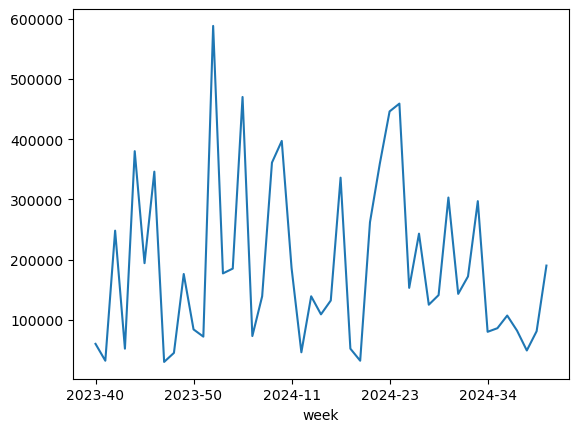

In [15]:
# 1
def week_func(x):
    y = datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S').strftime('%Y-%W')
    return y
df['week']=df.index
df['week']=df['week'].apply(week_func)
week_data = df.groupby('week')['TotalRevenue'].sum()
week_data.plot()

<Axes: xlabel='date'>

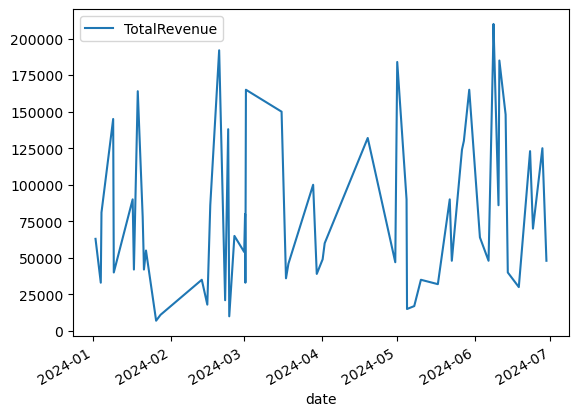

In [16]:
# 2
df['date']= pd.to_datetime(df.index)
month_df = df[(df['date'] > '2024-01-01') & (df['date'] < '2024-06-30')].sort_values('date')
month_df.plot(
    x='date',
    y='TotalRevenue'
)

              count
Country time       
중국      23        4
일본      02        3
미국      01        4
독일      04        5
대한민국    10        3


Country
대한민국    Axes(0.125,0.11;0.775x0.77)
독일      Axes(0.125,0.11;0.775x0.77)
미국      Axes(0.125,0.11;0.775x0.77)
일본      Axes(0.125,0.11;0.775x0.77)
중국      Axes(0.125,0.11;0.775x0.77)
dtype: object

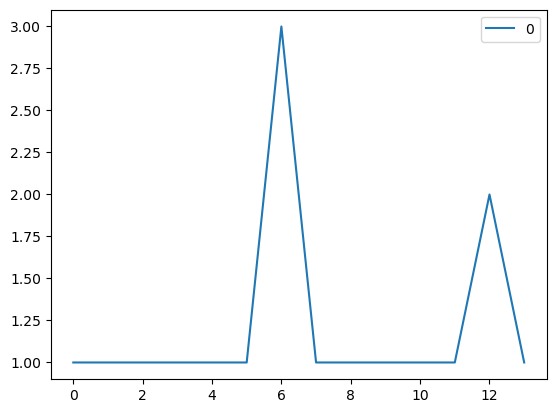

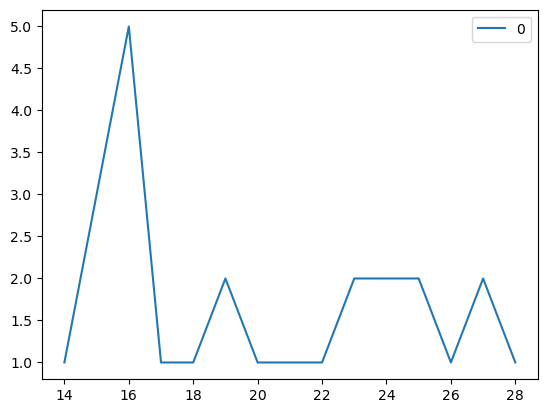

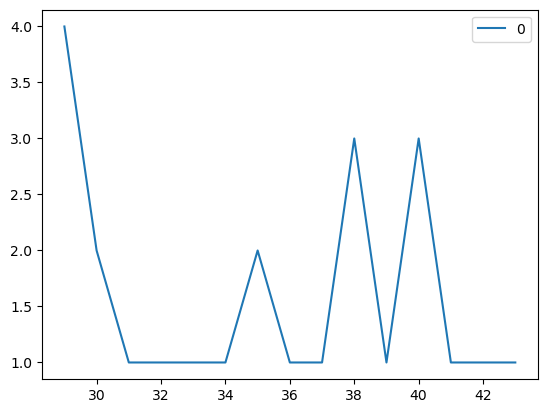

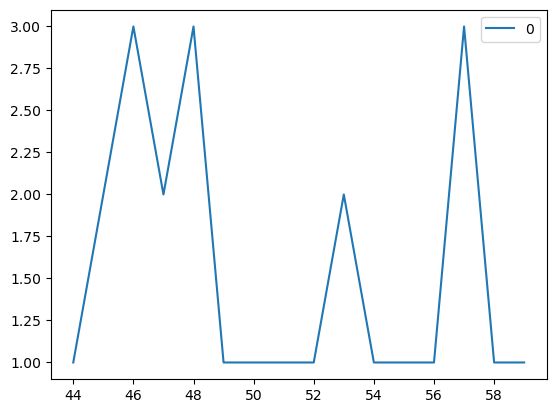

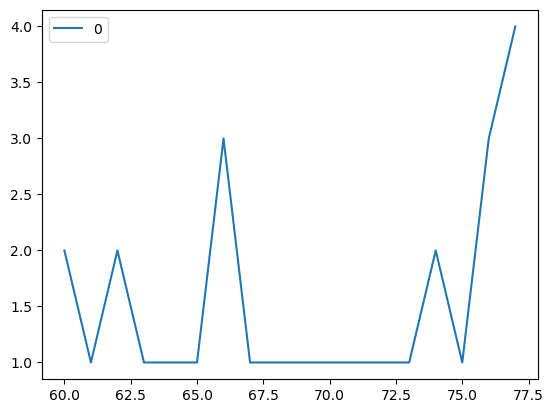

In [17]:
# 3 국가별 많이 주문한 시간 시각화
df['time'] = df['date'].apply(lambda x : str(x)[11:13])
order_time_1 = df.groupby(['Country','time']).agg(count=('Product', 'count'))
order_time_2 = order_time_1.sort_values(['Country','count'],ascending=False).groupby('Country').head(1)
print(order_time_2)

# order_time_2.plot(
#     kind='bar'
# )
# order_time_1.plot()
order_time_3 = order_time_1.T.unstack().reset_index()
type(order_time_3)
order_time_3
order_time_3.groupby(['Country']).plot()

6. **추가 분석**
    1. 고객의 **재구매율**을 분석하세요.
        - 재구매율 = 한 고객이 여러 번 주문한 비율
    2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.

In [18]:
df.head(2)

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,Country,DiscountRate,TotalRevenue,age,week,date,time
OrderDate,,,,,,,,,,,,,,
2024-06-10 17:18:00,1,역사책,Books,5,37000,1071,1980-08-08,미국,0.14,185000,40대,2024-24,2024-06-10 17:18:00,17
2023-11-18 18:45:00,2,셔츠,Clothing,5,20000,1526,1967-08-09,독일,0.29,100000,50대,2023-46,2023-11-18 18:45:00,18


In [34]:
# 1
customer_order = df.groupby(['CustomerID'])['OrderID'].count()
# customer_order[customer_order['ID'] >= 2]
customer_order_1 = pd.DataFrame({
    'CustomerID' : customer_order.index,
    'OrderID' : customer_order.values
})
customer_order_2 = customer_order_1[customer_order_1['OrderID'] >= 2]

In [20]:
# 2
